# Tarea 3 Electromagnetismo I
## Implementación Método de relajación 
### Isabella Ruiz Jiménez - 202112934


In [172]:
import matplotlib.pyplot as plt
import numpy as np

In [173]:
#Definimos el valor de discretización y las dimensiones del cuadrado 
dx = 0.1
dy = 0.1
a = 10
b = 10
v_0 = 5

#Definimos umbral del 0.1% para el método
Delta = 0.001

In [174]:
def relaxation_method():
    
    delta = 1
    
    #Definimos nuestra discretización de x e y
    x = np.linspace(0, a, 1+ int(np.round(xmax/dx)))
    y = np.linspace(0, b, 1+ int(np.round(ymax/dy)))
    lx = len(x)
    ly = len(y)

    #Definimos matriz inicial de potencial
    U = np.zeros([lx, ly])
    
    #Se llenan las condiciones de frontera
    U[:,0]=-v_0
    U[:,ly-1]=v_0

    #Se llenan con valores aleatorios los demás espacios
    for i in range(1, lx-1):
        for j in range(1, ly-1):
            U[i][j]=np.random.random()
    
    #Se relajan los valores de potencial
    while delta > Delta:
        delta = 0
        for i in range(1, lx-1):
            for j in range(1, ly-1):
                
                V_viejo = U[i][j]
                V_promedio_vecinos = (1/4)*(U[i+1,j]+U[i, j+1]+U[i-1,j]+U[i, j-1])
                
                U[i][j] = V_promedio_vecinos
                V_nuevo = U[i][j]
                #delta acumula la variación del potencial eléctrico
                delta += np.abs((V_nuevo-V_viejo)/V_viejo)
                
        #Se calcula el promedio de las variaciones en el potencial para ser comparado con el umbral definido  
        delta = delta/1e4
        
        #print(delta)
        
    X,Y = np.meshgrid(x,y)
    return U, X, Y

V, X, Y = relaxation_method()

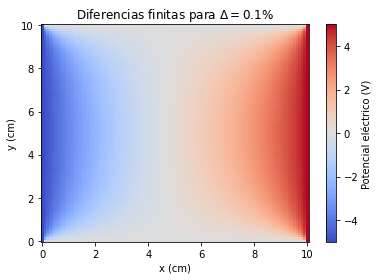

In [175]:
#Se grafica en 2D el potencial encontrado con el método iterativo 

plt.pcolormesh(X, Y, V, cmap='coolwarm')
plt.colorbar(label = "Potencial eléctrico (V)")
plt.title(r'Diferencias finitas para $\Delta=0.1$%')
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

#plt.savefig("DiferenciasFinitas2D.png", dpi=600, bbox_inches='tight')

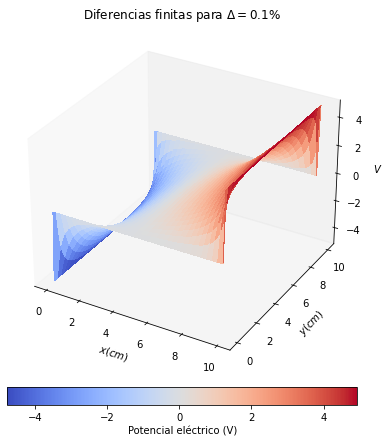

In [176]:
#Se grafica en 3D
fig = plt.figure(figsize= (7, 7))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, V, cmap='coolwarm', linewidth=0, antialiased=False)
ax.grid(b=None)

ax.set_xlabel('$x (cm)$')
ax.set_ylabel('$y (cm)$')
ax.set_zlabel('$V$')

ax.set_title(r'Diferencias finitas para $\Delta=0.1$%', size =12)
fig.colorbar(surf, label = "Potencial eléctrico (V)", orientation='horizontal', fraction=0.046, pad=0.04)

#plt.savefig("DiferenciasFinitas3D.png", dpi=600, bbox_inches='tight')

In [177]:
#Se calcula ahora el potencial teórico
def V_teorico(x, y):
    
    V = 0
    #Se incluyen los 100 primeros términos de la serie
    for n in range(100):
        n_impar = 2*n+1
        p1 = 4*v_0/(n_impar*np.pi)
        p2 = ( np.sinh(n_impar*np.pi*y/a) - np.sinh(n_impar*np.pi/a*(b-y)) ) / ( np.sinh(n_impar*np.pi*b/a) )
        p3 = np.sin(n_impar*np.pi*x/a)
        V_ = p1*p2*p3 
        V += V_
    return V

V_teo = np.zeros([lx, ly])

for i in range(len(x)):
    for j in range(len(y)):
        V_teo[i][j] = V_teorico(x[i], y[j])
        
X, Y = np.meshgrid(x, y)

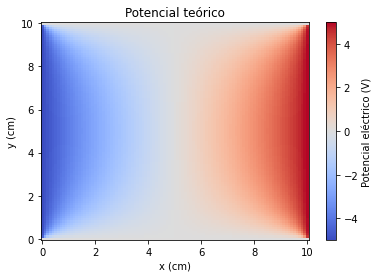

In [178]:
#Se grafica el potencial teórico en 2D

plt.pcolormesh(X, Y, V_teo, cmap='coolwarm')
plt.colorbar(label = "Potencial eléctrico (V)")
plt.title(r'Potencial teórico')
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

#plt.savefig("PotencialTeorico2D.png", dpi=1000, bbox_inches='tight')

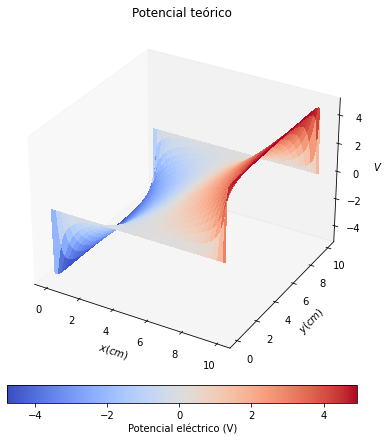

In [179]:
#Se grafica en 3D
fig = plt.figure(figsize= (7, 7))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, V_teo, cmap='coolwarm', linewidth=0, antialiased=False)
ax.grid(b=None)

ax.set_xlabel('$x (cm)$')
ax.set_ylabel('$y (cm)$')
ax.set_zlabel('$V$')

ax.set_title(r'Potencial teórico', size =12)
fig.colorbar(surf, label = "Potencial eléctrico (V)", orientation='horizontal', fraction=0.046, pad=0.04)

#plt.savefig("PotencialTeorico3D.png", dpi=1000, bbox_inches='tight')

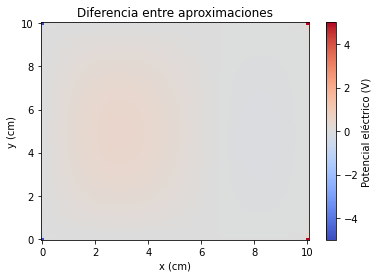

In [180]:
#Se grafica ahora la diferencia entre ambos métodos en 2D

plt.pcolormesh(X, Y, (V-V_teo), cmap='coolwarm')
plt.colorbar(label = "Potencial eléctrico (V)")
plt.title("Diferencia entre aproximaciones")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

#plt.savefig("DiferenciaEntreAproximaciones2D.png", dpi=1000, bbox_inches='tight')

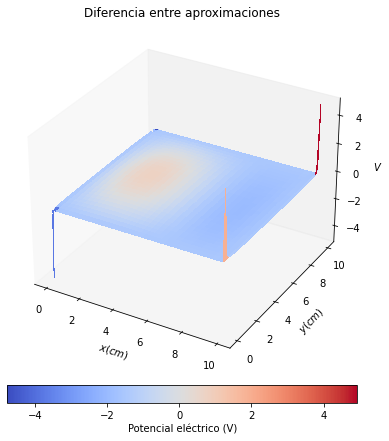

In [181]:
#Se grafica la diferencia en 3D

fig = plt.figure(figsize= (7, 7))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, V-V_teo, cmap='coolwarm', linewidth=0, antialiased=False)
ax.grid(b=None)

ax.set_xlabel('$x (cm)$')
ax.set_ylabel('$y (cm)$')
ax.set_zlabel('$V$')

ax.set_title(r'Diferencia entre aproximaciones', size =12)
fig.colorbar(surf, label = "Potencial eléctrico (V)", orientation='horizontal', fraction=0.046, pad=0.04)

#plt.savefig("DiferenciaEntreAproximaciones3D.png", dpi=1000, bbox_inches='tight')